In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=10000)

2024-07-02 20:45:06.337285: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 20:45:06.340684: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 20:45:06.351815: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 20:45:06.373565: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 20:45:06.373610: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-02 20:45:06.387674: I tensorflow/core/platform/cpu_feature_guard.cc:

In [2]:
max_length = max([max(x) for x in train_data])
max_length

9999

In [3]:
word_dict = imdb.get_word_index()
reverse_word_dict = dict([(value,key) for key,value in word_dict.items()])

In [4]:
def generate_review(n):
    return " ".join(reverse_word_dict.get(i-3, "?") for i in train_data[n])

In [5]:
review = generate_review(1)
review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [6]:
import numpy as np
def vectorized_data(sequences):
    result = np.zeros((len(sequences),10000))
    for i,sequence in enumerate(sequences):
        for j in sequence:
            result[i,j] = 1

    return result

In [7]:
x_train = vectorized_data(train_data)
x_test = vectorized_data(test_data)

In [8]:
y_train = np.asarray(train_label).astype("float32")
y_test = np.asarray(test_label).astype("float32")

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=32, activation="relu"),
    layers.Dense(units=32, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])

In [10]:
x_train_val = x_train[:10000,]
x_train = x_train[10000:,]
y_train_val = y_train[:10000,]
y_train = y_train[10000:,]

In [11]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

2024-07-02 20:45:13.488890: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-02 20:45:13.489376: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
history = model.fit(x_train,y_train,epochs=20, batch_size=512, validation_data=(x_train_val, y_train_val))

Epoch 1/20


2024-07-02 20:45:13.878655: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6905 - loss: 0.5912 - val_accuracy: 0.8395 - val_loss: 0.3930
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8887 - loss: 0.3134 - val_accuracy: 0.8786 - val_loss: 0.3084
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9196 - loss: 0.2271 - val_accuracy: 0.8876 - val_loss: 0.2764
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9374 - loss: 0.1843 - val_accuracy: 0.8553 - val_loss: 0.3630
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9493 - loss: 0.1521 - val_accuracy: 0.8781 - val_loss: 0.3223
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9588 - loss: 0.1269 - val_accuracy: 0.8770 - val_loss: 0.3364
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9604 - loss: 0.1147 - val_accuracy: 0.8836 - val_loss: 0.3166
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9745 - loss: 0.0865 - val_accuracy: 0.8673 - val_loss: 0.

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

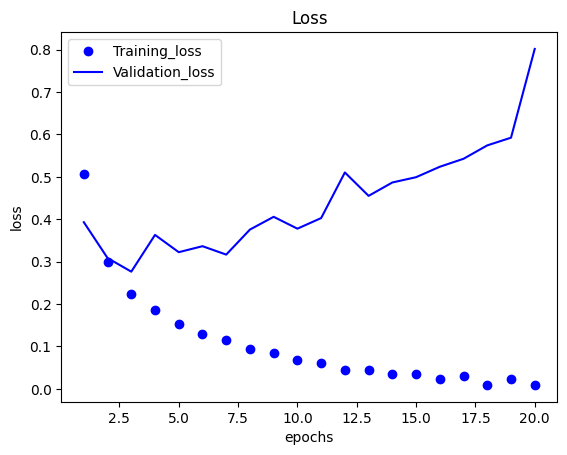

In [14]:
import matplotlib.pyplot as plt

epochs = np.arange(1,21)
plt.plot(epochs, history_dict.get("loss"), "bo", label="Training_loss")
plt.plot(epochs, history_dict.get("val_loss"),"b", label="Validation_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("Loss")
plt.show()

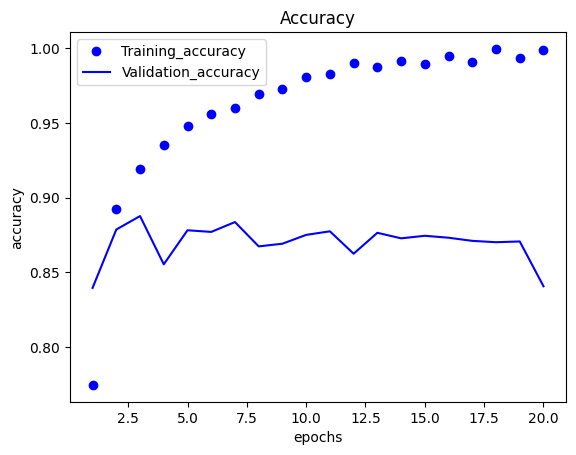

In [15]:
plt.plot(epochs, history_dict.get("accuracy"), "bo", label="Training_accuracy")
plt.plot(epochs, history_dict.get("val_accuracy"),"b", label="Validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

In [16]:
result = model.evaluate(x_test, y_test)
result

 90/782 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8327 - loss: 0.8780

2024-07-02 20:45:26.102449: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8292 - loss: 0.8857


[0.8790695071220398, 0.829200029373169]

In [18]:
model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])

In [19]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [20]:
history = model.fit(x_train,y_train,epochs=4, batch_size=512, validation_data=(x_train_val, y_train_val))

Epoch 1/4


2024-07-02 20:45:28.108242: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6623 - loss: 0.6294 - val_accuracy: 0.8649 - val_loss: 0.4302
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8846 - loss: 0.3796 - val_accuracy: 0.8718 - val_loss: 0.3377
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9141 - loss: 0.2684 - val_accuracy: 0.8607 - val_loss: 0.3327
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9251 - loss: 0.2183 - val_accuracy: 0.8813 - val_loss: 0.2964


In [21]:
result = model.evaluate(x_test, y_test)

154/782 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.8737 - loss: 0.3012

2024-07-02 20:45:31.805315: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8710 - loss: 0.3140


In [22]:
result

[0.314616322517395, 0.8708800077438354]

In [26]:
New Model having only 2 layer

SyntaxError: invalid syntax (2169630178.py, line 1)

In [27]:
model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(x_train,y_train,epochs=4, batch_size=512, validation_data=(x_train_val, y_train_val))
result = model.evaluate(x_test, y_test)
result

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6944 - loss: 0.6040 - val_accuracy: 0.8459 - val_loss: 0.4267
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8884 - loss: 0.3729 - val_accuracy: 0.8772 - val_loss: 0.3436
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9126 - loss: 0.2892 - val_accuracy: 0.8786 - val_loss: 0.3120
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9264 - loss: 0.2389 - val_accuracy: 0.8861 - val_loss: 0.2916
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8802 - loss: 0.3035


[0.30133455991744995, 0.88264000415802]

In [28]:
model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(x_train,y_train,epochs=4, batch_size=512, validation_data=(x_train_val, y_train_val))
result = model.evaluate(x_test, y_test)
result

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6360 - loss: 0.6459 - val_accuracy: 0.8362 - val_loss: 0.4510
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8736 - loss: 0.3933 - val_accuracy: 0.8314 - val_loss: 0.3940
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9045 - loss: 0.2867 - val_accuracy: 0.8843 - val_loss: 0.2964
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9375 - loss: 0.2086 - val_accuracy: 0.8862 - val_loss: 0.2873
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8792 - loss: 0.2992


[0.2985627055168152, 0.8792799711227417]

In [29]:
model = keras.Sequential([
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(x_train,y_train,epochs=4, batch_size=512, validation_data=(x_train_val, y_train_val))
result = model.evaluate(x_test, y_test)
result

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6733 - loss: 0.5976 - val_accuracy: 0.8538 - val_loss: 0.3744
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8865 - loss: 0.3198 - val_accuracy: 0.8702 - val_loss: 0.3149
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9122 - loss: 0.2367 - val_accuracy: 0.8721 - val_loss: 0.3121
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9385 - loss: 0.1846 - val_accuracy: 0.8863 - val_loss: 0.2815
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8763 - loss: 0.2991


[0.29834654927253723, 0.8783199787139893]

In [30]:
model = keras.Sequential([
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(x_train,y_train,epochs=4, batch_size=512, validation_data=(x_train_val, y_train_val))
result = model.evaluate(x_test, y_test)
result

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6892 - loss: 0.5773 - val_accuracy: 0.8556 - val_loss: 0.3712
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8849 - loss: 0.3209 - val_accuracy: 0.8686 - val_loss: 0.3285
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9198 - loss: 0.2413 - val_accuracy: 0.8836 - val_loss: 0.2887
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9293 - loss: 0.2051 - val_accuracy: 0.8757 - val_loss: 0.3084
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8648 - loss: 0.3240


[0.32520779967308044, 0.8653600215911865]

In [31]:
model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["accuracy"],
)
history = model.fit(x_train,y_train,epochs=4, batch_size=512, validation_data=(x_train_val, y_train_val))
result = model.evaluate(x_test, y_test)
result

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6992 - loss: 0.2092 - val_accuracy: 0.8308 - val_loss: 0.1414
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8853 - loss: 0.1147 - val_accuracy: 0.8478 - val_loss: 0.1176
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9094 - loss: 0.0847 - val_accuracy: 0.8846 - val_loss: 0.0937
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9280 - loss: 0.0678 - val_accuracy: 0.8888 - val_loss: 0.0865
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8824 - loss: 0.0907


[0.08976290374994278, 0.883840024471283]

In [32]:
model = keras.Sequential([
    layers.Dense(units=16, activation="tanh"),
    layers.Dense(units=16, activation="tanh"),
    layers.Dense(units=1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(x_train,y_train,epochs=4, batch_size=512, validation_data=(x_train_val, y_train_val))
result = model.evaluate(x_test, y_test)
result

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7025 - loss: 0.5615 - val_accuracy: 0.8719 - val_loss: 0.3529
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8914 - loss: 0.3080 - val_accuracy: 0.8707 - val_loss: 0.3111
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9298 - loss: 0.2064 - val_accuracy: 0.8863 - val_loss: 0.2774
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9501 - loss: 0.1546 - val_accuracy: 0.8830 - val_loss: 0.2930
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8742 - loss: 0.3098


[0.3064170181751251, 0.8769999742507935]

In [34]:
model = keras.Sequential([
    layers.Dense(units=16, activation="leaky_relu"),
    layers.Dense(units=16, activation="leaky_relu"),
    layers.Dense(units=1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(x_train,y_train,epochs=4, batch_size=512, validation_data=(x_train_val, y_train_val))
result = model.evaluate(x_test, y_test)
result

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7126 - loss: 0.5956 - val_accuracy: 0.8657 - val_loss: 0.4055
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8941 - loss: 0.3452 - val_accuracy: 0.8575 - val_loss: 0.3445
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9246 - loss: 0.2425 - val_accuracy: 0.8875 - val_loss: 0.2826
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9359 - loss: 0.1939 - val_accuracy: 0.8866 - val_loss: 0.2786
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8792 - loss: 0.2947


[0.29258257150650024, 0.8813199996948242]